In [1]:

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense, LeakyReLU
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import datetime
import time
import json
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk


#import tensorflow as tf
#from tensorflow.keras.preprocessing.image import load_img, img_to_array
#from tensorflow.keras.applications import VGG16

In [2]:
# Parameters
img_width, img_height = 224, 224
top_model_weights_path = 'bottleneck_fc_model.weights.h5'
train_data_dir = r'C:\Users\pravi\Desktop\major project\new\Data_Set\train'
validation_data_dir = r'C:\Users\pravi\Desktop\major project\new\Data_Set\val'
test_data_dir = r'C:\Users\pravi\Desktop\major project\new\Data_Set\test'
batch_size = 32

In [3]:
#Loading vgc16 model
vgg16 = VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

In [4]:

#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict(generator, predict_size_train) 
 
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 926 images belonging to 9 classes.
29/29 [==============================] - 241s 8s/step
Time:  0:04:03.224677


In [5]:
# Save class indices
class_indices = generator.class_indices
reversed_class_indices = {v: k for k, v in class_indices.items()}

print("Class Indices: ", class_indices)
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

Class Indices:  {'Bud rot': 0, 'Exposed roots': 1, 'Healthy Inflorescence': 2, 'Healthy Leaf': 3, 'Healthy Stem': 4, 'Leaf spot disease': 5, 'Split disease': 6, 'Stem Rot': 7, 'inflorescence dieback': 8}


In [6]:

#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
# Generate bottleneck features for validation
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_validation = vgg16.predict(generator, predict_size_train) 
 
np.save('bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 367 images belonging to 9 classes.
12/12 [==============================] - 100s 9s/step
Time:  0:01:42.787233


In [7]:
# Generate bottleneck features for testing
 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_validation = vgg16.predict(generator, predict_size_train) 
 
np.save('bottleneck_features_test.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 192 images belonging to 9 classes.
6/6 [==============================] - 45s 7s/step
Time:  0:00:48.132898


In [8]:
#training data
generator_top = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
train_data = np.load('bottleneck_features_train.npy') 
 
# get the class labels for the training data, in the original order 
train_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 926 images belonging to 9 classes.


In [9]:
#validation data
generator_top = datagen.flow_from_directory( 
   validation_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
validation_data = np.load('bottleneck_features_validation.npy') 
 
# get the class labels for the training data, in the original order 
validation_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 367 images belonging to 9 classes.


In [10]:
#test data
generator_top = datagen.flow_from_directory( 
   test_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load('bottleneck_features_test.npy') 
 
# get the class labels for the training data, in the original order 
test_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 192 images belonging to 9 classes.


In [11]:

start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [12]:
# history = model.fit(np.array(train_data), np.array(train_labels), epochs=7,batch_size=batch_size, validation_data=(np.array(validation_data), np.array(validation_labels)))
history = model.fit(train_data, train_labels, epochs=50,batch_size=batch_size, validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)

Epoch 1/50
29/29 [==============================] - 3s 34ms/step - loss: 1.5292 - acc: 0.4762 - val_loss: 0.8012 - val_acc: 0.7548
Epoch 2/50
29/29 [==============================] - 1s 24ms/step - loss: 0.8199 - acc: 0.7149 - val_loss: 0.5151 - val_acc: 0.9101
Epoch 3/50
29/29 [==============================] - 1s 25ms/step - loss: 0.6030 - acc: 0.7970 - val_loss: 0.3687 - val_acc: 0.9264
Epoch 4/50
29/29 [==============================] - 1s 25ms/step - loss: 0.4776 - acc: 0.8499 - val_loss: 0.3242 - val_acc: 0.9101
Epoch 5/50
29/29 [==============================] - 1s 24ms/step - loss: 0.3992 - acc: 0.8672 - val_loss: 0.2936 - val_acc: 0.9237
Epoch 6/50
29/29 [==============================] - 1s 24ms/step - loss: 0.3262 - acc: 0.9039 - val_loss: 0.2499 - val_acc: 0.9346
Epoch 7/50
29/29 [==============================] - 1s 24ms/step - loss: 0.2662 - acc: 0.9244 - val_loss: 0.1935 - val_acc: 0.9428
Epoch 8/50
29/29 [==============================] - 1s 25ms/step - loss: 0.2219 - a

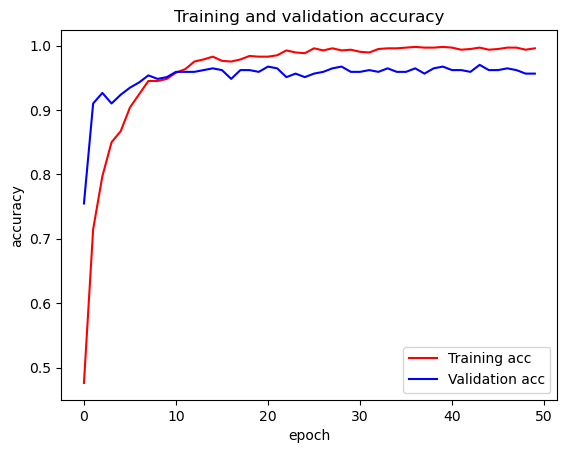

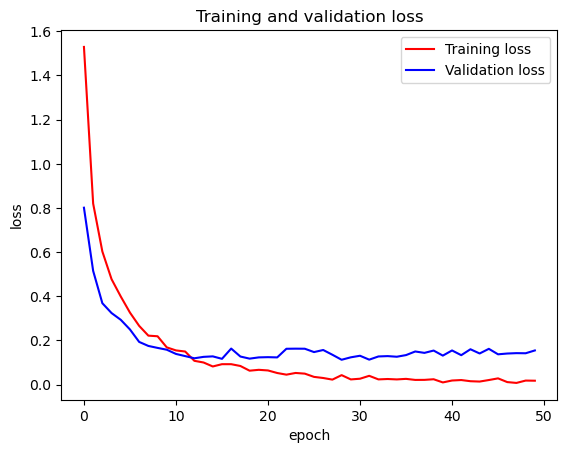

In [13]:
#Graphing our training and validation
# Plot training & validation accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [14]:
# Evaluation on test data
scores = model.evaluate(test_data, test_labels, verbose=0)
print(f"Test Accuracy: {scores[1]*100:.2f}%")

# Evaluate on training data
train_scores = model.evaluate(train_data, train_labels, verbose=0)
print(f"Training Accuracy: {train_scores[1]*100:.2f}%")

# Evaluate on validation data
val_scores = model.evaluate(validation_data, validation_labels, verbose=0)
print(f"Validation Accuracy: {val_scores[1]*100:.2f}%")


Test Accuracy: 91.67%
Training Accuracy: 99.89%
Validation Accuracy: 95.64%


6/6 [==============================] - 0s 5ms/step


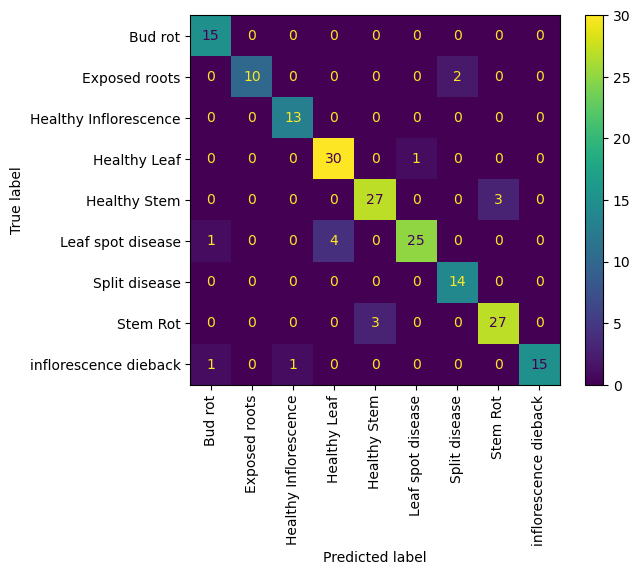

In [15]:
# Confusion Matrix
preds = model.predict(test_data)
categorical_preds = np.argmax(preds, axis=1)
categorical_test_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(categorical_test_labels, categorical_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[reversed_class_indices[i] for i in range(num_classes)])
disp.plot(xticks_rotation='vertical')
plt.show()

In [17]:
from sklearn import metrics
import numpy as np

# Assuming preds contains probabilities, convert them to class indices
preds_class_indices = np.argmax(preds, axis=1)

# Convert test_labels from one-hot encoded format to class indices if necessary
test_class_indices = np.argmax(test_labels, axis=1)

# Labels for the classes
labels = ["Bud Rot", "Exposed roots", "Healthy Inflorescence", "Healthy Leaf", "Healthy Stem", "Leaf spot disease", "Split disease", "Stem Rot", "Inflorescence Dieback"]

# Generate classification report
classification_metrics = metrics.classification_report(test_class_indices, preds_class_indices, target_names=labels)
print(classification_metrics)


                       precision    recall  f1-score   support

              Bud Rot       0.88      1.00      0.94        15
        Exposed roots       1.00      0.83      0.91        12
Healthy Inflorescence       0.93      1.00      0.96        13
         Healthy Leaf       0.88      0.97      0.92        31
         Healthy Stem       0.90      0.90      0.90        30
    Leaf spot disease       0.96      0.83      0.89        30
        Split disease       0.88      1.00      0.93        14
             Stem Rot       0.90      0.90      0.90        30
Inflorescence Dieback       1.00      0.88      0.94        17

             accuracy                           0.92       192
            macro avg       0.93      0.92      0.92       192
         weighted avg       0.92      0.92      0.92       192



In [16]:
model.save(r'C:\Users\pravi\Desktop\major project\flask application\arecanut disease identification\model.h5')


In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model  # To load your custom model
import json

# Global variables
file = []
model = None

# Tkinter GUI
def load_image():
    global file, img, panel, status_label
    file = filedialog.askopenfilenames(initialdir="C:/Users/pravi/Desktop/major project/new/Data_Set/test", title="Select file", filetypes=(("jpeg files", "*.jpg"), ("all files", "*.*")))
    if file:
        img = Image.open(file[0])
        img = img.resize((250, 250), Image.Resampling.LANCZOS)
        img = ImageTk.PhotoImage(img)
        panel.configure(image=img)
        panel.image = img
        status_label.config(text="Image selected successfully.", fg="green")
    else:
        status_label.config(text="No image selected.", fg="red")

def classify_callback():
    if not file:
        status_label.config(text="Please select an image first.", fg="red")
        return
    
    # Load class indices
    with open('class_indices.json', 'r') as f:
        class_indices = json.load(f)
    class_names = {v: k for k, v in class_indices.items()}
    
    # Load VGG16 model pre-trained on ImageNet without the top classifier
    vgg16 = VGG16(include_top=False, weights='imagenet')
    
    # Load and preprocess the image
    test_image = load_img(file[0], target_size=(224, 224))
    test_image = img_to_array(test_image)
    test_image = test_image / 255.0
    test_image = np.expand_dims(test_image, axis=0)
    
    # Predict using VGG16
    bt_prediction = vgg16.predict(test_image)
    
    # Load the custom model for classification
    global model
    if model is None:
        model = load_model(r'C:\Users\pravi\Desktop\major project\flask application\arecanut disease identification\model.h5')  # Replace 'path_to_your_model.h5' with the actual path to your custom model
    
    preds = model.predict(bt_prediction)
    predicted_class_index = np.argmax(preds)
    
    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]
    confidence = preds[0][predicted_class_index]  # Confidence of the predicted class
    
    if confidence < 0.8:
        result_text.config(state=tk.NORMAL)
        result_text.delete("1.0", tk.END)
        result_text.insert(tk.END, "It does not seem like an areca nut")
        result_text.config(state=tk.DISABLED)
        status_label.config(text="Classification successful.", fg="green")
        return
    
    # Display the result
    result = f"Predicted as {predicted_class_name}"
    result_text.config(state=tk.NORMAL)
    result_text.delete("1.0", tk.END)
    result_text.insert(tk.END, result)
    result_text.config(state=tk.DISABLED)
    status_label.config(text="Classification successful.", fg="green")

root = tk.Tk()
root.title("Image Classification")

canvas = tk.Canvas(root, height=500, width=600)
canvas.pack()

frame = tk.Frame(root, bg="#ffffff")
frame.place(relwidth=1, relheight=1)

panel = tk.Label(frame)
panel.place(relx=0.15, rely=0.1, relwidth=0.7, relheight=0.5)

btn = tk.Button(frame, text="Select an Image", padx=10, pady=5, fg="white", bg="#263D42", command=load_image)
btn.pack()

classify_btn = tk.Button(frame, text="Classify", padx=10, pady=5, fg="white", bg="#263D42", command=classify_callback)
classify_btn.pack()

status_label = tk.Label(frame, text="", bg="#ffffff")
status_label.pack()

result_text = tk.Text(frame, height=2, width=50, bg="#ffffff")
result_text.pack()

root.mainloop()


In [52]:
import distutils
print("distutils version:", distutils.__version__)




distutils version: 3.12.0
